# Řešení projektu TimeDeposit_10K na předmět 4IZ480, ZS 2020/21

**Tým:**

Dominik Hartinger   
Pavel Ovčička   
Michal Dupkala   
Jáchym Dvořák   

## Exploratorní analýzy

Zakladni knihovny a prvni pohled na data, import pomoci pandas, kontrola poctu zaznamu, formatu, NaN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

raw = pd.read_csv('TimeDeposit_10K.csv', sep = ';')
raw.head()

,Customer_ID,Gender,Birth_Date,Ref_Date,Marital_Status,Children_Num,Occupation_Category,Total_Income,Payroll_Flag,Business_Flag,...,Transfer_Trans_Amount,Credit_Cards_Installments,Credit_Cards_Payments_Num,Credit_Cards_Purchases_Num,Credit_Cards_Witrhdrawals_Num,Credit_Cards_Payments_Amount,Credit_Cards_Purchases_Amount,Credit_Cards_Witrhdrawals_Amount,Arrears_Months_Max,Time_Deposits_Flag
0,5904453.0,Male,1960-10-17,2008-12-31,Married,2.0,Rentiers,14000.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,1.0,F
1,5904524.0,Male,1972-02-22,2008-12-31,Divorced,0.0,Employees,17577.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,1.0,F
2,5904672.0,Male,1953-06-24,2008-12-31,Married,1.0,Rentiers,3000.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,F
3,125603.0,Male,1952-09-19,2008-12-31,Married,0.0,Rentiers,14735.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,F
4,1065914.0,Male,1960-08-04,2008-12-31,Single,0.0,Business-Owners,99755.0,0.0,1.0,...,0.0,8.666667,3.5,2.0,0.0,275.833333,78.22,0.0,2.0,F


In [2]:
len(raw)

10000

In [3]:
raw.isna().sum()

Customer_ID                         0
Gender                              0
Birth_Date                          0
Ref_Date                            0
Marital_Status                      0
Children_Num                        0
Occupation_Category                 0
Total_Income                        0
Payroll_Flag                        0
Business_Flag                       0
Saving_Current_Accounts_Flag        0
Investment_Products_Flag            0
Insurance_Products_Flag             0
Business_Loans_Flag                 0
Housing_Loans_Flag                  0
Consumer_Loans_Flag                 0
Credit_Cards_Flag                   0
Saving_Current_Balance              0
Investment_Products_Balance         0
Insurance_Balances                  0
Business_Loans_Balance              0
Housing_Loans_Balance               0
Consumer_Loans_Balance              0
Credit_Cards_Balance                0
Branch_Trans_Num                    0
ATM_Trans_Num                       0
APS_Trans_Nu

In [4]:
(raw == 0).astype(int).sum()

Customer_ID                            0
Gender                                 0
Birth_Date                             0
Ref_Date                               0
Marital_Status                         0
Children_Num                        5909
Occupation_Category                    0
Total_Income                         506
Payroll_Flag                        7479
Business_Flag                       9211
Saving_Current_Accounts_Flag        1348
Investment_Products_Flag            9385
Insurance_Products_Flag             8431
Business_Loans_Flag                 9420
Housing_Loans_Flag                  9409
Consumer_Loans_Flag                 5491
Credit_Cards_Flag                   2645
Saving_Current_Balance              2083
Investment_Products_Balance         9390
Insurance_Balances                  8441
Business_Loans_Balance              9424
Housing_Loans_Balance               9415
Consumer_Loans_Balance              5827
Credit_Cards_Balance                5303
Branch_Trans_Num

In [5]:
raw.dtypes

Customer_ID                         float64
Gender                               object
Birth_Date                           object
Ref_Date                             object
Marital_Status                       object
Children_Num                        float64
Occupation_Category                  object
Total_Income                        float64
Payroll_Flag                        float64
Business_Flag                       float64
Saving_Current_Accounts_Flag        float64
Investment_Products_Flag            float64
Insurance_Products_Flag             float64
Business_Loans_Flag                 float64
Housing_Loans_Flag                  float64
Consumer_Loans_Flag                 float64
Credit_Cards_Flag                   float64
Saving_Current_Balance              float64
Investment_Products_Balance         float64
Insurance_Balances                  float64
Business_Loans_Balance              float64
Housing_Loans_Balance               float64
Consumer_Loans_Balance          

## Manipulace s daty
pruzkum rozlozeni hodnot a formatu jednotlivych sloupcu a uvaha o tom, ktere potrebujeme a ktere ne 

In [6]:
# no NaNs, tons of numeric data, let's see column by column
raw.drop('Customer_ID', axis = 1, inplace = True)


In [7]:
#how many genders do we actually have (that's a joke)
raw['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Mapovani kategoricke promenne pohlavi na numericke hodnoty (binarni promenna)

In [8]:
raw['Gender'] = raw['Gender'].map({'Male': 0, 'Female': 1})
raw['Gender'].values

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

Vypocet data s ohledem na referencni datum uvedene v popisu dat, tvorba sloupce Age a smazani puvodnich sloupcu

In [9]:
#ref_date should be used as the current date when calculating age, let's make it easy
raw['Birth_Date'] = pd.to_datetime(raw['Birth_Date'])
raw['Ref_Date'] = pd.to_datetime(raw['Ref_Date'])
print(raw['Birth_Date'].dtype, raw['Ref_Date'].dtype)

datetime64[ns] datetime64[ns]


In [10]:
#dates to datetime, get day difference, calculate years by common rule and round down
raw['Age'] = (np.floor((pd.to_datetime(raw['Ref_Date']) - 
             pd.to_datetime(raw['Birth_Date'])).dt.days / 365.25)).astype(np.float64)

In [11]:
raw['Age'].value_counts()
#cool, we have some numbers

42.0    325
36.0    324
41.0    311
40.0    308
31.0    305
39.0    299
48.0    294
29.0    293
28.0    290
43.0    287
37.0    282
30.0    279
34.0    279
38.0    278
32.0    275
35.0    272
33.0    271
45.0    268
46.0    265
49.0    257
44.0    252
47.0    232
50.0    231
51.0    226
27.0    223
26.0    215
53.0    207
52.0    205
55.0    182
54.0    170
25.0    167
62.0    157
57.0    154
56.0    154
61.0    140
59.0    139
58.0    136
60.0    126
63.0    125
24.0    110
64.0    102
23.0     99
69.0     80
65.0     75
66.0     73
67.0     68
22.0     62
68.0     52
21.0     38
20.0     24
19.0     14
Name: Age, dtype: int64

Ze zvedavosti histogram vekovych kategorii, jen pro predstavu jak reprezentativni vzorek je

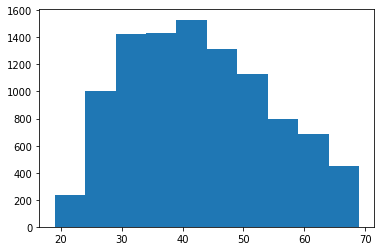

In [12]:
#let's check the distribution of age, maybe it's interesting
plt.hist(raw['Age']);

A jeste histogram vsech numerickych sloupcu pro predstavu

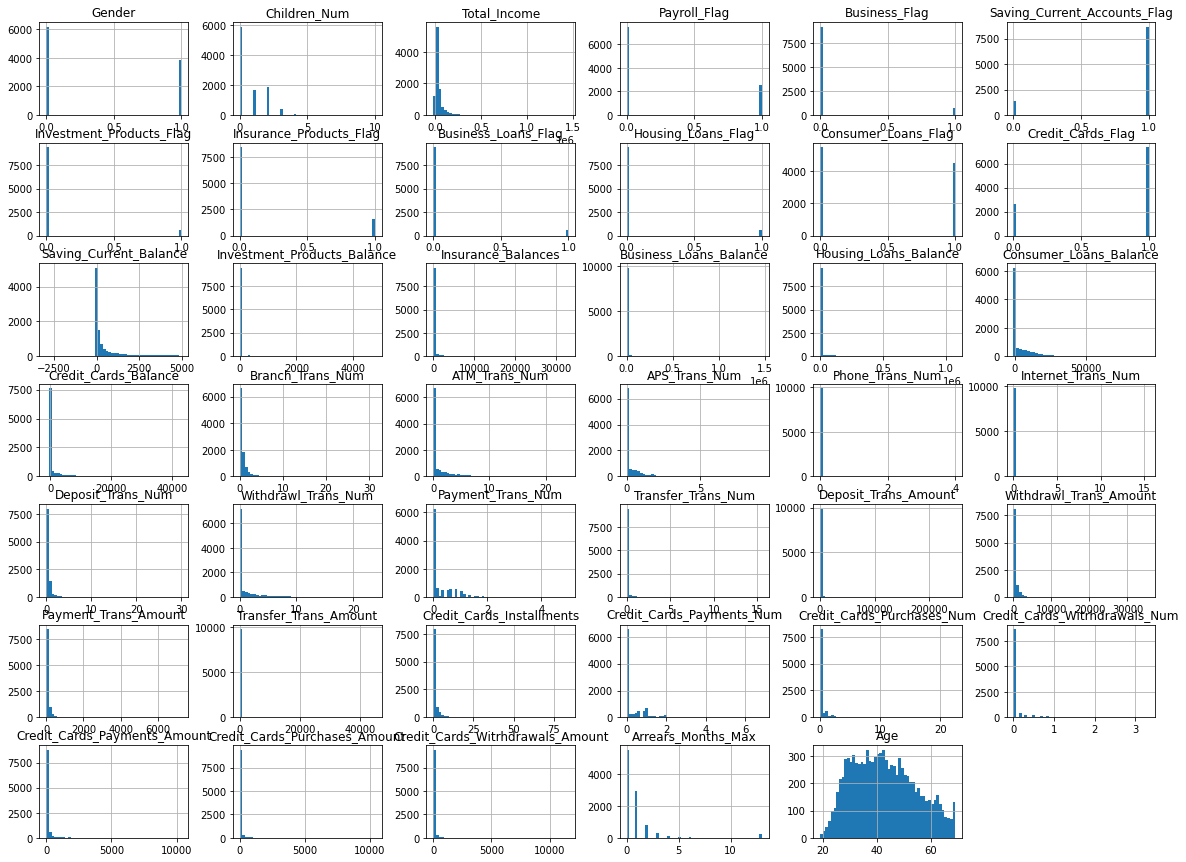

In [13]:
raw.hist(bins = 50, figsize = (20,15))
plt.show()

In [14]:
#pretty fine, looks approximately normally distributed so there's no hard bias with this variable
#getting rid of date variables, don't need them anymore
raw.drop(['Ref_Date','Birth_Date'], axis = 1, inplace=True)

One-hot-encoding promenne Marital_Status

In [15]:
# the marital status should be one-hot-encoded, as there's no direct relationship between categories if we used
# single column encoding
raw['Marital_Status'].value_counts()

Married     6089
Single      2956
Divorced     739
Widow        216
Name: Marital_Status, dtype: int64

In [16]:
checkpoint = raw.copy() #you never know
categories = ['Married','Single','Divorced','Widow']
#can use pandas get_dummies or sklearn.preprocessing OneHotEncoder, however get_dummies is better if we want to 
#get rid of multicollinearity later

dummies = pd.get_dummies(raw['Marital_Status'], columns = categories)



In [17]:
raw = pd.concat([raw, dummies], axis = 1)

In [18]:
raw.drop('Marital_Status', axis = 1, inplace = True)

Uprava promenne Occupation_category, ktera by sla promenit na numericke hodnoty, nelze ale jednoznacne uvazovat vycislitelny hierarchicky vztah mezi kategoriemi, a tak je i tato promenna premenena pomoci One-hot-encodingu

In [19]:
#the last object feature is occupation category, let's see the values
raw['Occupation_Category'].value_counts()

Employees          5609
Business-Owners    1775
Retirees           1108
Rentiers            642
Unemployeed         506
Self-Employees      360
Name: Occupation_Category, dtype: int64

In [20]:
#this is a tricky feature. We can't assume linear relationship between categories, since we also have unemployed and
#retired people in our dataset. We can either one-hot-encode them all, or divide into categories like employed, unemployed, 
#retired, but for the sake of the exercise we will just one-hot-encode them all.
checkpoint = raw.copy()

cats = ['Regular employee','Business Owner','Retired','Rentier','Unemployed','Self-employed']
dummies2 = pd.get_dummies(raw['Occupation_Category'], columns = cats)
dummies2.head()

,Business-Owners,Employees,Rentiers,Retirees,Self-Employees,Unemployeed
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [21]:
raw = pd.concat([raw, dummies2], axis = 1)
raw.drop('Occupation_Category', axis = 1, inplace = True)

In [22]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            10000 non-null  int64  
 1   Children_Num                      10000 non-null  float64
 2   Total_Income                      10000 non-null  float64
 3   Payroll_Flag                      10000 non-null  float64
 4   Business_Flag                     10000 non-null  float64
 5   Saving_Current_Accounts_Flag      10000 non-null  float64
 6   Investment_Products_Flag          10000 non-null  float64
 7   Insurance_Products_Flag           10000 non-null  float64
 8   Business_Loans_Flag               10000 non-null  float64
 9   Housing_Loans_Flag                10000 non-null  float64
 10  Consumer_Loans_Flag               10000 non-null  float64
 11  Credit_Cards_Flag                 10000 non-null  float64
 12  Savin

Preorganizovani tabulky

In [23]:
#let's order the dataset with y being the last feature
raw.columns

Index(['Gender', 'Children_Num', 'Total_Income', 'Payroll_Flag',
       'Business_Flag', 'Saving_Current_Accounts_Flag',
       'Investment_Products_Flag', 'Insurance_Products_Flag',
       'Business_Loans_Flag', 'Housing_Loans_Flag', 'Consumer_Loans_Flag',
       'Credit_Cards_Flag', 'Saving_Current_Balance',
       'Investment_Products_Balance', 'Insurance_Balances',
       'Business_Loans_Balance', 'Housing_Loans_Balance',
       'Consumer_Loans_Balance', 'Credit_Cards_Balance', 'Branch_Trans_Num',
       'ATM_Trans_Num', 'APS_Trans_Num', 'Phone_Trans_Num',
       'Internet_Trans_Num', 'Deposit_Trans_Num', 'Withdrawl_Trans_Num',
       'Payment_Trans_Num', 'Transfer_Trans_Num', 'Deposit_Trans_Amount',
       'Withdrawl_Trans_Amount', 'Payment_Trans_Amount',
       'Transfer_Trans_Amount', 'Credit_Cards_Installments',
       'Credit_Cards_Payments_Num', 'Credit_Cards_Purchases_Num',
       'Credit_Cards_Witrhdrawals_Num', 'Credit_Cards_Payments_Amount',
       'Credit_Cards_Purchases

In [24]:
proper_cats = ['Gender', 'Children_Num', 'Total_Income', 'Payroll_Flag',
       'Business_Flag', 'Saving_Current_Accounts_Flag',
       'Investment_Products_Flag', 'Insurance_Products_Flag',
       'Business_Loans_Flag', 'Housing_Loans_Flag', 'Consumer_Loans_Flag',
       'Credit_Cards_Flag', 'Saving_Current_Balance',
       'Investment_Products_Balance', 'Insurance_Balances',
       'Business_Loans_Balance', 'Housing_Loans_Balance',
       'Consumer_Loans_Balance', 'Credit_Cards_Balance', 'Branch_Trans_Num',
       'ATM_Trans_Num', 'APS_Trans_Num', 'Phone_Trans_Num',
       'Internet_Trans_Num', 'Deposit_Trans_Num', 'Withdrawl_Trans_Num',
       'Payment_Trans_Num', 'Transfer_Trans_Num', 'Deposit_Trans_Amount',
       'Withdrawl_Trans_Amount', 'Payment_Trans_Amount',
       'Transfer_Trans_Amount', 'Credit_Cards_Installments',
       'Credit_Cards_Payments_Num', 'Credit_Cards_Purchases_Num',
       'Credit_Cards_Witrhdrawals_Num', 'Credit_Cards_Payments_Amount',
       'Credit_Cards_Purchases_Amount', 'Credit_Cards_Witrhdrawals_Amount',
       'Arrears_Months_Max', 'Age', 'Divorced',
       'Married', 'Single', 'Widow', 'Business-Owners', 'Employees',
       'Rentiers', 'Retirees', 'Self-Employees', 'Unemployeed', 'Time_Deposits_Flag',]
raw = raw[proper_cats]

Kontrola hodnot v jednotlivych sloupcich

In [25]:
#are the flags actually 0/1?
raw['Credit_Cards_Flag'].value_counts()

1.0    7355
0.0    2645
Name: Credit_Cards_Flag, dtype: int64

In [26]:
#let's assume the remaining flags are binary as well
(raw['Total_Income'] == 0).sum()

506

Pruzkum multikolinearity - ukazuji Flags a Balance stejnou informaci?

In [27]:
#is zero income right or missing value? Taking into account that the dataset seems to be complete, let's assume 
#this is on purpose and the people really do have zero official income
cols_to_remove = []
#let's think about the columns we do not need, be it because of multicollinearity or other reasons
print(raw['Business-Owners'].sum(), raw['Business_Flag'].sum()) #no relationship
print(raw['Saving_Current_Accounts_Flag'].sum(), (raw['Saving_Current_Balance']!=0).sum()) #ppl have accounts with no money,can be relevant
print(raw['Investment_Products_Flag'].sum(), (raw['Investment_Products_Balance']>0).sum()) #let's investigate further


1775 789.0
8652.0 7917
615.0 610


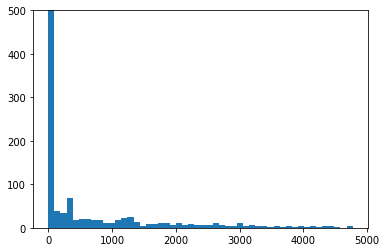

In [28]:
plt.hist((raw['Investment_Products_Balance']), bins = 50)
plt.ylim(top=500);

In [29]:
#yeah let's drop Investment flag
cols_to_remove.append('Investment_Products_Flag')


Srovnavani pozitivnich poctu pribuznych features - Flags vs. Balance a odstranovani flags v pripade podezreni o multikolinearite

In [30]:
print(raw['Insurance_Products_Flag'].sum(), (raw['Insurance_Balances']>0).sum()) #remove

1569.0 1559


In [31]:
cols_to_remove.append('Insurance_Products_Flag')

In [32]:
print(raw['Business_Loans_Flag'].sum(), (raw['Business_Loans_Balance']>0).sum()) #remove

580.0 574


In [33]:
cols_to_remove.append('Business_Loans_Flag')

In [34]:
print(raw['Housing_Loans_Flag'].sum(), (raw['Housing_Loans_Balance']>0).sum()) #remove

591.0 585


In [35]:
cols_to_remove.append('Housing_Loans_Flag')

Consumer Loans je specialni - Balance muze byt 0, avsak flag stale 1 - pujcka je tedy splacena, ale neni uzavrena. Predpokladame, ze rozhoduje castka, a tak Flag odstranime, ackoliv se pocty mirne lisi

In [36]:
print(raw['Consumer_Loans_Flag'].sum(), (raw['Consumer_Loans_Balance']>0).sum()) 

4509.0 4132


c:\users\hartd\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hartd\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


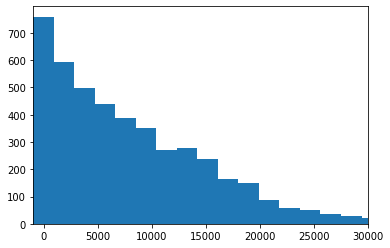

In [37]:
toplot = [raw['Consumer_Loans_Balance'].where(raw['Consumer_Loans_Flag']==1)]
plt.hist(toplot, bins = 50)
plt.xlim(-1000,30000);

In [38]:
#assuming there are ppl with opened consumer loan who do not owe anything, yet their loan hasn't been closed, we remove
#this flag as well
cols_to_remove.append('Consumer_Loans_Flag')

Opak je pravdou u Credit Cards - fakt, ze je osoba drzitelem kreditni karty (v americkem slova smyslu, i.e. cerpa z ni na dluh), je dulezity, nebot predstavuje urcite riziko. Vyse kreditniho dluhu je taky dulezity fakt a vypovida o necem trochu jinem. Kombinace obou by mohla byt samostatna promenna. Ponechame obe promenne.

In [39]:
print(raw['Credit_Cards_Flag'].sum(), (raw['Credit_Cards_Balance']>0).sum())
#there are people with credit cards with no debt, however, this might be important, guess we keep that one

7355.0 3984


Secteme pocet jednotlivych druhu transakci do jedineho sloupce a puvodnich se kvuli snizeni zbytecne dimenzionality zbavime.

In [40]:
#let's just straight up sum and then remove numbers of transactions
print(raw.columns.get_loc("Branch_Trans_Num"),raw.columns.get_loc("Transfer_Trans_Num"))

19 27


In [41]:
raw['Total_transactions'] = raw.iloc[:,raw.columns.get_loc("Branch_Trans_Num"):raw.columns.get_loc("Transfer_Trans_Num")].sum(axis=1)

In [42]:
raw['Total_transactions'].describe()

count    10000.000000
mean         3.625320
std          4.828016
min          0.000000
25%          0.500000
50%          2.000000
75%          4.666667
max         61.833334
Name: Total_transactions, dtype: float64

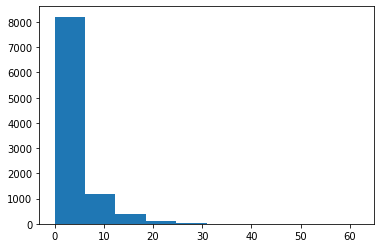

In [43]:
plt.hist(raw['Total_transactions']);

Pocet plateb a nakupu smazeme take, nechame si pouze hodnoty, ktere maji vyssi vypovidajici hodnotu

In [44]:
#lets just remove credit cards cash movements numbers
for i in ['Credit_Cards_Payments_Num','Credit_Cards_Purchases_Num','Credit_Cards_Witrhdrawals_Num']:
    cols_to_remove.append(i)

In [45]:
for i in ['Branch_Trans_Num','ATM_Trans_Num','APS_Trans_Num','Phone_Trans_Num','Internet_Trans_Num','Deposit_Trans_Num',
         'Withdrawl_Trans_Num','Payment_Trans_Num','Transfer_Trans_Num']:
    cols_to_remove.append(i)

In [46]:
len(raw.columns)

53

In [47]:
raw.drop(cols_to_remove, axis = 1, inplace = True)
df = raw.copy()
df.head()

,Gender,Children_Num,Total_Income,Payroll_Flag,Business_Flag,Saving_Current_Accounts_Flag,Credit_Cards_Flag,Saving_Current_Balance,Investment_Products_Balance,Insurance_Balances,...,Single,Widow,Business-Owners,Employees,Rentiers,Retirees,Self-Employees,Unemployeed,Time_Deposits_Flag,Total_transactions
0,0,2.0,14000.0,0.0,0.0,1.0,1.0,27.288333,0.0,0.0,...,0,0,0,0,1,0,0,0,F,1.333332
1,0,0.0,17577.0,0.0,0.0,1.0,0.0,120.186666,0.0,0.0,...,0,0,0,1,0,0,0,0,F,7.333333
2,0,1.0,3000.0,0.0,0.0,1.0,0.0,987.435000,0.0,0.0,...,0,0,0,0,1,0,0,0,F,0.500000
3,0,0.0,14735.0,0.0,0.0,1.0,1.0,5.581666,0.0,0.0,...,0,0,0,0,1,0,0,0,F,0.000000
4,0,0.0,99755.0,0.0,1.0,1.0,1.0,1614.756666,0.0,0.0,...,1,0,1,0,0,0,0,0,F,6.000000


Pruzkum cilove promenne

In [48]:
#and of course, our y
df['Time_Deposits_Flag'].value_counts()

F    9897
T     103
Name: Time_Deposits_Flag, dtype: int64

In [49]:
df['Time_Deposits_Flag'] = df['Time_Deposits_Flag'].map({'F' : 0, 'T' : 1})

In [50]:
df['Time_Deposits_Flag'].value_counts()

0    9897
1     103
Name: Time_Deposits_Flag, dtype: int64

Objevili jsme, ze pozitivnich pripadu mame jen kolem 1% ze vsech zaznamu. 

In [51]:
#we only have 103 yes labels, this is a problem for all the ML algorithms, this is too small
#whatever, let's go on
df.columns

Index(['Gender', 'Children_Num', 'Total_Income', 'Payroll_Flag',
       'Business_Flag', 'Saving_Current_Accounts_Flag', 'Credit_Cards_Flag',
       'Saving_Current_Balance', 'Investment_Products_Balance',
       'Insurance_Balances', 'Business_Loans_Balance', 'Housing_Loans_Balance',
       'Consumer_Loans_Balance', 'Credit_Cards_Balance',
       'Deposit_Trans_Amount', 'Withdrawl_Trans_Amount',
       'Payment_Trans_Amount', 'Transfer_Trans_Amount',
       'Credit_Cards_Installments', 'Credit_Cards_Payments_Amount',
       'Credit_Cards_Purchases_Amount', 'Credit_Cards_Witrhdrawals_Amount',
       'Arrears_Months_Max', 'Age', 'Divorced', 'Married', 'Single', 'Widow',
       'Business-Owners', 'Employees', 'Rentiers', 'Retirees',
       'Self-Employees', 'Unemployeed', 'Time_Deposits_Flag',
       'Total_transactions'],
      dtype='object')

In [52]:
colsfinal = ['Gender', 'Children_Num', 'Total_Income', 'Payroll_Flag',
       'Business_Flag', 'Saving_Current_Accounts_Flag', 'Credit_Cards_Flag',
       'Saving_Current_Balance', 'Investment_Products_Balance',
       'Insurance_Balances', 'Business_Loans_Balance', 'Housing_Loans_Balance',
       'Consumer_Loans_Balance', 'Credit_Cards_Balance',
       'Deposit_Trans_Amount', 'Withdrawl_Trans_Amount',
       'Payment_Trans_Amount', 'Transfer_Trans_Amount',
       'Credit_Cards_Installments', 'Credit_Cards_Payments_Amount',
       'Credit_Cards_Purchases_Amount', 'Credit_Cards_Witrhdrawals_Amount',
       'Arrears_Months_Max', 'Age', 'Divorced', 'Married', 'Single', 'Widow',
       'Business-Owners', 'Employees', 'Rentiers', 'Retirees',
       'Self-Employees', 'Unemployeed', 'Total_transactions', 'Time_Deposits_Flag']
df = df[colsfinal]

## Předprocesování dat na strojové učení

Máme připravenou finální datovou sadu a rozdělíme jí na:

a) trénovací data pro algoritmy   
b) validační data pro zjištění kvality klasifikace   
c) testová data pro finální evaluaci kvality modelu - ty budou použita jen jednou po vybrání vhodného modelu

Pak se podíváme a ověříme, že opravdu rozdělené datové sady obsahují to, co mají.

In [53]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

Zde pomocí balíčku sklearn rozdělíme dataset na X, tedy vysvětlující proměnné, a y, tedy vysvětlovanou proměnnou, kterou chceme predikovat (a to postupně nejdříve na testovací a trénovací, a trénovací dále na trénovací a validační). 

Ověříme, že jsou naše datasety stejně velké a že máme stejný počet záznamů jako na začátku.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1000, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 1000, random_state = 42)

In [55]:
lent = len(X_train)
lenv = len(X_valid)
lents = len(X_test)

print(f'''Počet záznamů v trénovacích datech: {lent} 
Počet záznamů ve validačních datech: {lenv} 
Počet záznamů v testovacích datech {lents}'''.format(lent, lenv, lents))

Počet záznamů v trénovacích datech: 8000 
Počet záznamů ve validačních datech: 1000 
Počet záznamů v testovacích datech 1000


Zde se podíváme na počet pozitivních záznamů (počet zákazníků, kteří si otevřeli termínovaný vklad. Vidíme, že jejich výskyt je velmi nízké (<1%). Později se k tomu vrátíme a budeme to řešit.

In [56]:
print('Počet pozitivních záznamů v trénovacích datech: '+ str((y_train == 1).sum()),
      '\nPočet pozitivních záznamů ve validačních datech: '+str((y_valid == 1).sum()),
      '\nPočet pozitivních záznamů v testovacích datech: '+str((y_test == 1).sum()))

Počet pozitivních záznamů v trénovacích datech: 85 
Počet pozitivních záznamů ve validačních datech: 6 
Počet pozitivních záznamů v testovacích datech: 12


Nyní je potřeba data přeškálovat na normální rozdělení proměnných. Některé algoritmy (např. neuronové sítě) mohou dávat mnohem větší význam relativně vyšším hodnotám (např. věk je v jiných řádech než počet dětí, takže by algoritmus dával větší váhu věku.

StandardScaler() je objekt z balíčku sci-kit learn, který všechno normalizuje na normované normální rozdělení N(0,1) pomocí odečtení průměru sloupce a vydělení jeho směrodatnou odchylkou.

Je důležité použít odhadnuté parametry **pouze** z trénovacího setu, abychom neovlivnili validační a testová data. Proto použijeme metodu fit() pouze na trénovací set a pomocí odhadnutých parametrů transformujeme i zbylé datasety.

In [57]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_valid = scaler1.transform(X_valid)
X_test = scaler1.transform(X_test);

lent = len(X_train)
lenv = len(X_valid)
lents = len(X_test)

print(f'''Počet záznamů v trénovacích datech: {lent} 
Počet záznamů ve validačních datech: {lenv} 
Počet záznamů v testovacích datech {lents}'''.format(lent, lenv, lents))

Počet záznamů v trénovacích datech: 8000 
Počet záznamů ve validačních datech: 1000 
Počet záznamů v testovacích datech 1000


## Klasifikační modely strojového učení

První využijeme metody Ensemble learning (Random Forest, Extra Trees, Support vector Classifier, Naive Bayes a Multi-layer perceptron classifier knihovny Scikit-learn). První modely trénujeme, pak hodnotíme jejich výkonnost.

Nejdříve fitujeme modely s defaultními hyperparametry, a na základě nejvhodnějšího algoritmu pak můžeme vybrat i vhodné hyperparametry.

Zároveň jsme vybrali váhy pro nevyvážené třídy (kde třída '1', tedy 'zák. koupil termínovaný vklad', je v zastoupení cca 1 %) jako způsob zvýšení přesnosti v odhalení třídy.

Nastavíme argument "random_state" na 42 kvůli reprodukovatelnosti výsledků.


In [58]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

w0 =  10000/(2*9909)
w1 =  10000/(2*91)

random_forest_clf = RandomForestClassifier(random_state=42, class_weight = {0: w0, 1: w1})
extra_trees_clf = ExtraTreesClassifier(random_state=42, class_weight = {0: w0, 1: w1})
svm_clf = LinearSVC(max_iter = 1000, random_state=42)
mlp_clf = MLPClassifier(max_iter = 1000, random_state=42)
gnb_clf = GaussianNB()

In [59]:
estimators = [random_forest_clf, extra_trees_clf, mlp_clf, gnb_clf, svm_clf]
for index, estimator in enumerate(estimators):
    print("Trénování algoritmu", estimator)
    estimator.fit(X_train, y_train)

Trénování algoritmu RandomForestClassifier(class_weight={0: 0.5045917852457362,
                                     1: 54.94505494505494},
                       random_state=42)
Trénování algoritmu ExtraTreesClassifier(class_weight={0: 0.5045917852457362, 1: 54.94505494505494},
                     random_state=42)
Trénování algoritmu MLPClassifier(max_iter=1000, random_state=42)
Trénování algoritmu GaussianNB()
Trénování algoritmu LinearSVC(random_state=42)


c:\users\hartd\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Ohodnotíme kvalitu modelů pomocí validačního datasetu.

In [60]:
print('Přesnost modelů:\n')
for estimator in estimators:
    print(str(estimator)+':' ,estimator.score(X_valid, y_valid))

Přesnost modelů:

RandomForestClassifier(class_weight={0: 0.5045917852457362,
                                     1: 54.94505494505494},
                       random_state=42): 0.994
ExtraTreesClassifier(class_weight={0: 0.5045917852457362, 1: 54.94505494505494},
                     random_state=42): 0.993
MLPClassifier(max_iter=1000, random_state=42): 0.992
GaussianNB(): 0.874
LinearSVC(random_state=42): 0.994


Jak vidíme, tak algoritmus SVC nekonvergoval ani po nastavení 10000 iterací (defaultně je 1000).

Naive Bayes algoritmus měl výrazně horší výsledek než zbylé modely.

Tyto modely tedy vyřadíme.

Zbylé tři modely vložíme do Voting Classifieru, který umožné každému algoritmu "hlasovat" pro výslednou klasifikaci. Voting může být HARD (buď 0 nebo 1) nebo SOFT (vrací pravděpodobnost příslušnosti ke každé třídě). Zde necháme HARD voting.

In [61]:
from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("mlp_clf", mlp_clf),
]

voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train);

print('Přesnost klasifikace na validačním datasetu Voting Classifieru:', voting_clf.score(X_valid, y_valid))

Přesnost klasifikace na validačním datasetu Voting Classifieru: 0.994


### Logistická regrese

Ještě zkusíme logistickou regresi s nastavením "weights" jako "balanced", tedy do vyrovnání tříd.

Pro zobrazení matice záměn ještě vytvoříme funkci.

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_cm(labels, predictions, p=0.2):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d", cmap = 'Greens')
  plt.title('Confusion matrix at probability: {:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('No Time Deposit Detected (True Negatives): ', cm[0][0])
  print('New Time Deposit Incorrectly Detected (False Positives): ', cm[0][1])
  print('New Time Deposit Missed (False Negatives): ', cm[1][0])
  print('New Time Deposit Detected (True Positives): ', cm[1][1])
  print('Total New Deposits: ', np.sum(cm[1]))

No Time Deposit Detected (True Negatives):  710
New Time Deposit Incorrectly Detected (False Positives):  284
New Time Deposit Missed (False Negatives):  1
New Time Deposit Detected (True Positives):  5
Total New Deposits:  6


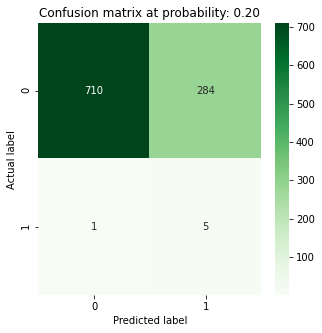

In [63]:
from sklearn.linear_model import LogisticRegression

glm = LogisticRegression(class_weight = 'balanced', random_state = 42)
clf_glm = glm.fit(X_train, y_train)

pred_glm = clf_glm.predict(X_valid)
plot_cm(y_valid, pred_glm)

Lineární regrese se zdá, při nastavení vah, predikuje relativně dobře naší hledanou třídu, ale má velký počet falešných pozitiv.

### Evaluace přesnosti klasifikačních modelů

Nyní ohodnotíme přesnost na finálním testovém datasetu. Přesnost se zdá skvělá, jenže je nutné zmínit, že pozitivních hodnot je opravdu málo (pod 1 %). Je potřeba provést další úpravy dat.

In [64]:
from sklearn.metrics import accuracy_score

y_predd = voting_clf.predict(X_test)
print('Přesnost Voting Classifieru na testových datech:', accuracy_score(y_test, y_predd))

Přesnost Voting Classifieru na testových datech: 0.988


Taky můžeme zkusit tzv. stacking, resp. blending, tedy že výstup z jednoho modelu je vstupem do dalšího, a tak se algoritmy navzájem opravují.

In [65]:
estimators = [random_forest_clf, extra_trees_clf, mlp_clf]
X_valid_predictions = np.empty((len(X_valid), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_valid_predictions[:, index] = estimator.predict(X_valid)

In [66]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_valid_predictions, y_valid);

In [67]:
print('Přesnost stackingu je: ', rnd_forest_blender.oob_score_)

Přesnost stackingu je:  0.994


## Neuronová síť pomoci TensorFlow knihovny (Keras)

In [68]:
import tensorflow as tf
from tensorflow import keras

Zde nejprve použijeme obecný model. 

Požijeme 3 vrstvy - vstupní s počtem neuronů rovným počtu vysvětlujících proměnných, prostřední s hyperparametrem pro počet neronů (zde 50) a poslední vrstvu s 2 neurony, protože máme binární klasifikaci.

Jako aktivační funkce použijeme ReLU (Rectified Linear Unit) ve vnitřních vrstvách a softmax ve vrstvě poslední, protože nás zajímá pravděpodobnost pro dané třídy.

Optimalizační algoritmus vybereme Adam, ztrátovu funkci Sparse Categorical Crossentropy. 

Metrikou bude přesnost (tedy kolik % správně klasifikujeme)

In [69]:
input_size = X_train.shape[1]
output_size = 2
hidden_layer_size = 50 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(output_size, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Nastavíme:   

Batch size (počet pozorování v jednom "nakrmení" algoritmu) na 250   
Počet epoch (kompletní iterace všemi daty) na 20   
Patience (pojistka proti overfittingu) na 30 - alrogitmus se zastaví, pokud 30x za sebou se ztráta zvýší   

Následující kus kódu trénuje model na train datech. Argument verbose vypisuje stav učení.

In [70]:
BATCH_SIZE = 250
MAX_EPOCHS = 200
patience = 30 
early_stopping = tf.keras.callbacks.EarlyStopping(patience = patience) 

history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = MAX_EPOCHS, callbacks = [early_stopping],
          validation_data = (X_valid, y_valid), verbose = 2)

Epoch 1/200
32/32 - 0s - loss: 0.3540 - accuracy: 0.9086 - val_loss: 0.1159 - val_accuracy: 0.9940
Epoch 2/200
32/32 - 0s - loss: 0.0882 - accuracy: 0.9894 - val_loss: 0.0484 - val_accuracy: 0.9940
Epoch 3/200
32/32 - 0s - loss: 0.0658 - accuracy: 0.9894 - val_loss: 0.0406 - val_accuracy: 0.9940
Epoch 4/200
32/32 - 0s - loss: 0.0621 - accuracy: 0.9894 - val_loss: 0.0381 - val_accuracy: 0.9940
Epoch 5/200
32/32 - 0s - loss: 0.0599 - accuracy: 0.9894 - val_loss: 0.0364 - val_accuracy: 0.9940
Epoch 6/200
32/32 - 0s - loss: 0.0582 - accuracy: 0.9894 - val_loss: 0.0356 - val_accuracy: 0.9940
Epoch 7/200
32/32 - 0s - loss: 0.0568 - accuracy: 0.9894 - val_loss: 0.0345 - val_accuracy: 0.9940
Epoch 8/200
32/32 - 0s - loss: 0.0556 - accuracy: 0.9894 - val_loss: 0.0341 - val_accuracy: 0.9940
Epoch 9/200
32/32 - 0s - loss: 0.0547 - accuracy: 0.9894 - val_loss: 0.0337 - val_accuracy: 0.9940
Epoch 10/200
32/32 - 0s - loss: 0.0539 - accuracy: 0.9894 - val_loss: 0.0335 - val_accuracy: 0.9940
Epoch 11/

Nyní se podíváme na vývoj ztráty na trénovacích a validačních datech v jednotlivých iteracích (tedy kdy algoritmus prošel všechna pozorování, nastaveno na 20). Pomocí toho můžeme odhadnout, kolik iterací (epoch) model potřebuje k naučení a kdy ž se jedná o overfitting.

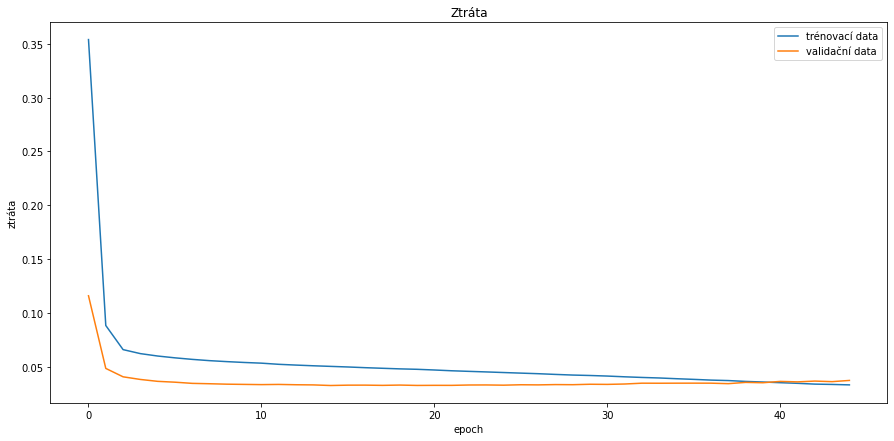

In [71]:
plt.figure(figsize=(15,7))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Ztráta')
plt.ylabel('ztráta')
plt.xlabel('epoch')
plt.legend(['trénovací data', 'validační data']);

Nyní se podíváme na predikci na finálním testovacím setu. 

In [72]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9880


In [73]:
print('Ztráta na testovacích datech: {0:.2f} \nPřesnost na testovacích datech: {1:.2f}%'
      .format(test_loss,test_accuracy*100.))

Ztráta na testovacích datech: 0.07 
Přesnost na testovacích datech: 98.80%


Opět se zdá přesnost dobrá, nicméně je potřeba pamatovat na nevyváženost datasetu. Tomu se budeme věnovat v následující sekci.

## Řešení malého počtu pozitivních hodnot pomocí metody SMOTE

Smote - Synthetic Minority Oversampling. 

Pomocí knihovny imblearn vytvoříme systetické záznamy založení na skutečných pozorováních. Nastavíme tedy oversampling na cílovou proměnnou '1' a undersampling na proměnnou '0'. Vybere se více pozitivních a méně negativních z původního datasetu.

In [74]:
import imblearn
from sklearn.linear_model import LogisticRegression
from collections import Counter

Vytvoříme 'pipeline', tedy postupné transformace.

In [75]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 0.15, random_state = 42)               #vytvoření oversamplingu (zvýšení pozitivních případů)
under = RandomUnderSampler(sampling_strategy = 0.4, random_state = 42) #vytvoření udersamplingu (snížení negativních případů)
seq = [('over', over),('under', under)]

pipeline = Pipeline(steps = seq)

Xn_train, yn_train = pipeline.fit_resample(X_train, y_train) #vytvoření nových datasetů a kontrola jejich velikosti
Xn_valid, yn_valid = pipeline.fit_resample(X_valid, y_valid) #vytvoření nových datasetů a kontrola jejich velikosti


print('Původní rozdělení negativních a pozitivních y:', 
      '\npozitivní:', Counter(y)[0],
      '\nnegativní:', Counter(y)[1],
      '\npoměr:', round((Counter(y)[1]/len(y)),2), 
      '\n',
      '\nRozdělení negativních a pozitivních y po resamplingu:',
      '\npozitivní:', Counter(yn_train)[0],
      '\nnegativní:', Counter(yn_train)[1],
      '\npoměr:', round((Counter(yn_train)[1]/len(yn_train)),2))

Původní rozdělení negativních a pozitivních y: 
pozitivní: 9897 
negativní: 103 
poměr: 0.01 
 
Rozdělení negativních a pozitivních y po resamplingu: 
pozitivní: 2967 
negativní: 1187 
poměr: 0.29


Zde graficky znázorníme pomocí PCA (Principal Component Analysis - analýza hlavních komponent) počet pozitivních a negativních cílových proměnných. Je to metoda, která sníží dimenzionalitu na dvojrozměrný prostor a lze tak její výstup vyzualizovat. Původních 35 proměnných tedy redukujeme do 2D prostoru a zobrazujeme pomocí scatterplotu.

Vypovídající hodnota jednotlivých komponent je měřena pomocí procent rozptylu, které jednotlivé dimenze vysvětlují. Skvělá hodnota je 0.95, dobrá nad 0.8, pod 0.6 není příliš dobrá. Využívá se ppři clusteringu nebo je jednou z metod snížení dimenzionality pro urychleni trénovacího procesu. 

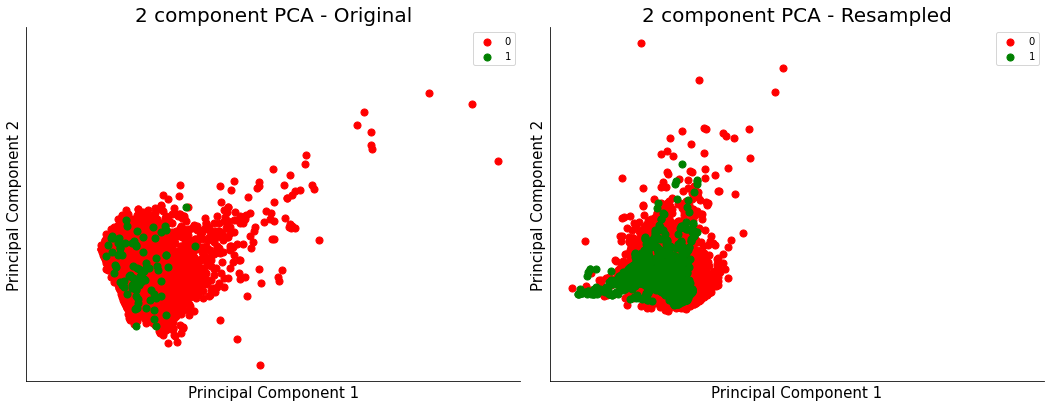

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
pcadf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
initialdist = pd.concat([pcadf, y], axis = 1)

# ORIGINAL DATASET

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6), sharey = True, sharex = True)
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 component PCA - Original', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = initialdist['Time_Deposits_Flag'] == target
    ax1.scatter(initialdist.loc[indicesToKeep, 'principal component 1']
               , initialdist.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)

# RESAMPLED DATASET

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xn_train)
pcadf2 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
newdist = pd.concat([pcadf2, yn_train], axis = 1)

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('2 component PCA - Resampled', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = newdist['Time_Deposits_Flag'] == target
    ax2.scatter(newdist.loc[indicesToKeep, 'principal component 1']
               , newdist.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax2.legend(targets)

plt.tight_layout()
sns.despine()
plt.xticks([])
plt.yticks([]);

Vypadá to, že resampling vytvořil mnohem balancovanější set - zelené body (pozorování s cílovou proměnnou '1') jsou mnohem četnější.

Můžeme tedy znovu rozdělit data na jednotlivé sety pro trénink a validaci modelu.

### Voting Classifier po resamplingu

Nyní opět použijeme Voting Classifier, nicméně vzhledem k tomu, že nyní použijeme metriku ROC AUC (tedy způsob evaluace kvality modelu pomocí TP a TN), je potřeba upravit voting na 'soft', aby nám hodil pravděpodobnosti příslušnosti k dané třídě. AUC chceme nad .8, ideálně nad .9

Evaluaci provedeme pomocí křížové validace (počet rozdělení nastavíme na 10, počet opakování na 3). 

In [79]:
lent = len(Xn_train)
lents = len(Xn_valid)

print(f'''Počet záznamů v trénovacích datech (resampled): {lent} 
Počet záznamů v testovacích datech (resampled): {lents}'''.format(lent, lenv, lents))

Počet záznamů v trénovacích datech (resampled): 4154 
Počet záznamů v testovacích datech (resampled): 521


In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

voting_clf_soft = VotingClassifier(named_estimators, voting = 'soft')
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
scores = cross_val_score(voting_clf_soft, Xn_train, yn_train, scoring = 'roc_auc', cv = cv)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.999


### Neuronová síť po resamplingu

Nyní opět fitujeme neuronovou síť na resampled datech. Poslední vrstva však tentokrát vrací jen jednu hodnotu, a protože děláme binární klasifikaci, tak použijeme funkci sigmoid, která má obor hodnot <0, 1>. 

Necháme stejný optimalizační algoritmus Adam, ale musíme upravit hyperparametr "learning rate" - velikost kroku, které v algoritmu back propagation neuronových sítí algoritmus udělá. Čím menší je, tím pomaleji algoritmus konverguje, ale tím spíše nalezne minimum loss funkce. Defaultní nastavení je .001, ale vyzkoušíme i další hodnoty.

Ztrátu opět měříme pomocí binární křížové entropie.

Metriku kvality modelu máme ROC AUC.

In [82]:
input_size = X.shape[1]
output_size = 1 #sigmoid = 1, softmax = 2
hidden_layer_size = 100

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(output_size, activation = 'sigmoid') 
])

lr = 0.0001
adam = tf.keras.optimizers.Adam(learning_rate=lr)
model2.compile(optimizer = adam, loss = 'BinaryCrossentropy', metrics = ['AUC'])

Záznam o učení modelu (tedy ztrátu, přesnost) ukládáme do proměnné history (standard v oblasti ML), abychom pak mohli metriky lépe zobrazovat.

Počet epoch (iterací skrze všechny pozorování) nastavíme tentokrát výše, abychom mohli sledovat, kdy model začne mít optimum a začíná overfitovat. Parametr 'patience' by měl zastavit v optimálním bodě.

In [83]:
BATCH_SIZE = 1000
MAX_EPOCHS = 750
patience = 30

early_stopping = tf.keras.callbacks.EarlyStopping(patience = patience) 

history2 = model2.fit(Xn_train, yn_train, batch_size = BATCH_SIZE, epochs = MAX_EPOCHS,
                      validation_data = (Xn_valid, yn_valid), verbose = 2, callbacks = [early_stopping])

Epoch 1/750
5/5 - 0s - loss: 0.7159 - auc: 0.4656 - val_loss: 0.7127 - val_auc: 0.4477
Epoch 2/750
5/5 - 0s - loss: 0.7044 - auc: 0.4703 - val_loss: 0.7013 - val_auc: 0.4662
Epoch 3/750
5/5 - 0s - loss: 0.6936 - auc: 0.4759 - val_loss: 0.6905 - val_auc: 0.4806
Epoch 4/750
5/5 - 0s - loss: 0.6838 - auc: 0.4817 - val_loss: 0.6804 - val_auc: 0.4926
Epoch 5/750
5/5 - 0s - loss: 0.6745 - auc: 0.4893 - val_loss: 0.6710 - val_auc: 0.5071
Epoch 6/750
5/5 - 0s - loss: 0.6662 - auc: 0.4962 - val_loss: 0.6623 - val_auc: 0.5202
Epoch 7/750
5/5 - 0s - loss: 0.6586 - auc: 0.5041 - val_loss: 0.6540 - val_auc: 0.5341
Epoch 8/750
5/5 - 0s - loss: 0.6514 - auc: 0.5122 - val_loss: 0.6464 - val_auc: 0.5489
Epoch 9/750
5/5 - 0s - loss: 0.6448 - auc: 0.5193 - val_loss: 0.6390 - val_auc: 0.5627
Epoch 10/750
5/5 - 0s - loss: 0.6385 - auc: 0.5272 - val_loss: 0.6320 - val_auc: 0.5768
Epoch 11/750
5/5 - 0s - loss: 0.6329 - auc: 0.5339 - val_loss: 0.6254 - val_auc: 0.5888
Epoch 12/750
5/5 - 0s - loss: 0.6274 - au

Epoch 95/750
5/5 - 0s - loss: 0.4460 - auc: 0.8544 - val_loss: 0.4031 - val_auc: 0.9422
Epoch 96/750
5/5 - 0s - loss: 0.4448 - auc: 0.8551 - val_loss: 0.4019 - val_auc: 0.9425
Epoch 97/750
5/5 - 0s - loss: 0.4436 - auc: 0.8558 - val_loss: 0.4008 - val_auc: 0.9423
Epoch 98/750
5/5 - 0s - loss: 0.4424 - auc: 0.8566 - val_loss: 0.3997 - val_auc: 0.9421
Epoch 99/750
5/5 - 0s - loss: 0.4412 - auc: 0.8574 - val_loss: 0.3986 - val_auc: 0.9420
Epoch 100/750
5/5 - 0s - loss: 0.4401 - auc: 0.8581 - val_loss: 0.3976 - val_auc: 0.9419
Epoch 101/750
5/5 - 0s - loss: 0.4389 - auc: 0.8587 - val_loss: 0.3968 - val_auc: 0.9421
Epoch 102/750
5/5 - 0s - loss: 0.4378 - auc: 0.8594 - val_loss: 0.3958 - val_auc: 0.9415
Epoch 103/750
5/5 - 0s - loss: 0.4367 - auc: 0.8601 - val_loss: 0.3949 - val_auc: 0.9413
Epoch 104/750
5/5 - 0s - loss: 0.4355 - auc: 0.8609 - val_loss: 0.3939 - val_auc: 0.9413
Epoch 105/750
5/5 - 0s - loss: 0.4344 - auc: 0.8616 - val_loss: 0.3928 - val_auc: 0.9415
Epoch 106/750
5/5 - 0s - l

Epoch 188/750
5/5 - 0s - loss: 0.3615 - auc: 0.9060 - val_loss: 0.3497 - val_auc: 0.9334
Epoch 189/750
5/5 - 0s - loss: 0.3607 - auc: 0.9065 - val_loss: 0.3497 - val_auc: 0.9328
Epoch 190/750
5/5 - 0s - loss: 0.3599 - auc: 0.9071 - val_loss: 0.3497 - val_auc: 0.9327
Epoch 191/750
5/5 - 0s - loss: 0.3592 - auc: 0.9077 - val_loss: 0.3496 - val_auc: 0.9326
Epoch 192/750
5/5 - 0s - loss: 0.3584 - auc: 0.9083 - val_loss: 0.3495 - val_auc: 0.9326
Epoch 193/750
5/5 - 0s - loss: 0.3576 - auc: 0.9088 - val_loss: 0.3493 - val_auc: 0.9329
Epoch 194/750
5/5 - 0s - loss: 0.3568 - auc: 0.9093 - val_loss: 0.3487 - val_auc: 0.9331
Epoch 195/750
5/5 - 0s - loss: 0.3561 - auc: 0.9098 - val_loss: 0.3485 - val_auc: 0.9330
Epoch 196/750
5/5 - 0s - loss: 0.3553 - auc: 0.9103 - val_loss: 0.3484 - val_auc: 0.9331
Epoch 197/750
5/5 - 0s - loss: 0.3545 - auc: 0.9107 - val_loss: 0.3483 - val_auc: 0.9328
Epoch 198/750
5/5 - 0s - loss: 0.3537 - auc: 0.9111 - val_loss: 0.3483 - val_auc: 0.9329
Epoch 199/750
5/5 - 0

Nyní se opět podíváme na vývoj ztráty na trénovacích a testovacích datech.

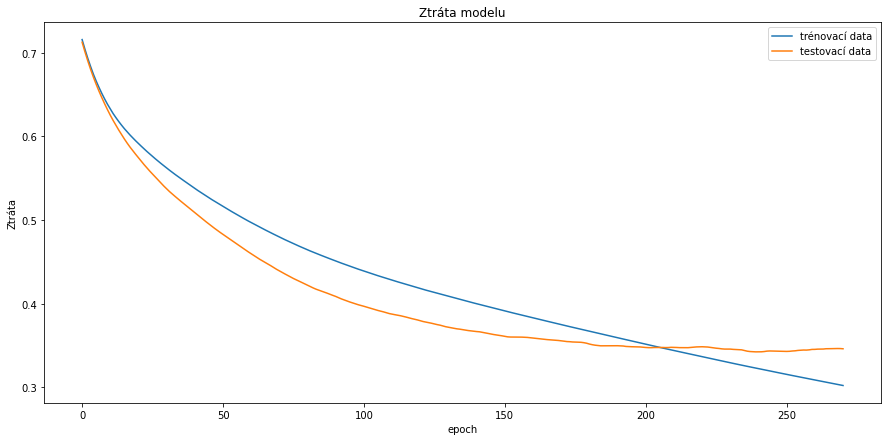

In [84]:
plt.figure(figsize=(15,7))

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Ztráta modelu')
plt.ylabel('Ztráta')
plt.xlabel('epoch')
plt.legend(['trénovací data', 'testovací data']);

Také se podíváme na vývoj ROC AUC - chceme, aby hodnota rostla a blížila se co nejvíce 1. Za dobré se dá považovat > .8.

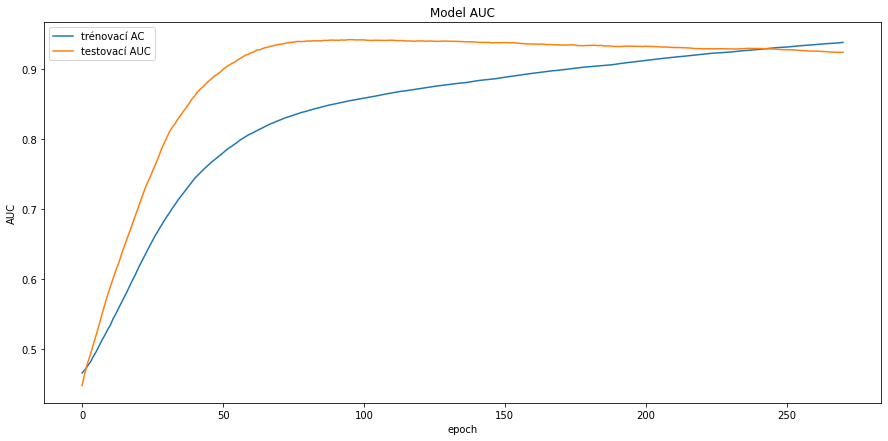

In [85]:
plt.figure(figsize=(15,7))

plt.plot(history2.history['auc'])
plt.plot(history2.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['trénovací AC', 'testovací AUC'], loc='upper left');

Nyní si vytvoříme funkci pro matici záměn a podíváme se na ní.

Jako threshold jsme zde zvolili 0.2 po vyzkoušení různých thresholdů - tento má nejlepší výkon na validačních datech.

In [86]:
y_pred3 = model2.predict(Xn_valid)
y_pred_test = model2.predict(X_test)

Matice záměn na syntetických datech:

No Time Deposit Detected (True Negatives):  267
New Time Deposit Incorrectly Detected (False Positives):  105
New Time Deposit Missed (False Negatives):  7
New Time Deposit Detected (True Positives):  142
Total New Deposits:  149


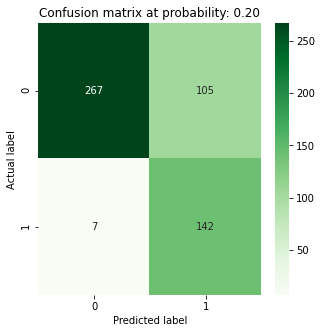

In [87]:
print('Matice záměn na syntetických datech:\n')
plot_cm(yn_valid, y_pred3)

Matice záměn na reálných testovacích datech:

No Time Deposit Detected (True Negatives):  701
New Time Deposit Incorrectly Detected (False Positives):  287
New Time Deposit Missed (False Negatives):  5
New Time Deposit Detected (True Positives):  7
Total New Deposits:  12


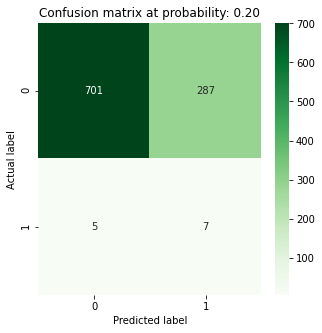

In [88]:
print('Matice záměn na reálných testovacích datech:\n')

plot_cm(y_test, y_pred_test)

Jak lze vidět, model není špatný. AUC konverguje okolo .8 a matice záměn ukazuje uspokojivé výsledky. Pořád však je počet FP příliš vysoký, ale to je cena, kterou platíme za odhalení 3/4 TP. Je však možné, že na relativně jednodušší klasifikaci bude vhodnější použít jednodušší model. Pojďme se tedy podívat zpět na nás náhodný les.

## Závěr a zjištění

Nyní znov fitneme náhodný les, najdeme nejlepší hyperparametry a podíváme na detailní metriky výkonu našeho náhodného lesa na validačních datech (které model doposud neviděl), a to protože ze všech modelů v našem voting classifieru měl nejlepší výsledky.

### Hledání nejlepších hyperparametrů

Když máme definovaný vhodný model, zkusíme ještě jeho výkon optimalizovat pomocí GridSearchCV, který nám pomůže z definovaných hyperparametrů vyzkoušet iterativně všechny a následně určit ty nejvhodnější pro maximalizaci definované metriky výkonu (zde ROC AUC).

Je nutné zmínit, že tato metoda hledá vhodné hyperparametry pro tréninková data, a tak nemusí zákonitě vyústit v lepší výkon na testovacích datech.

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # vyzkoušet 12 (3×4) kombinací hyperparametrů
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # vyzkoušet 6 (2×3) kombinací při boostrap = False
    {'bootstrap': [False], 'n_estimators': [5, 15, 25], 'max_features': [2, 3, 4], 'min_impurity_decrease': [0.5, 0.01, 0.001]},
  ]

# opět trénujeme model na 5 rozděleních v křížové validaci, což je (12+6)*5=90 iterací - proces chvíli trvá

RFC2 = RandomForestClassifier(random_state = 42) # nutno definovat nový model
grid_search = GridSearchCV(RFC2, param_grid, cv=5,
                           scoring= 'recall',
                           return_train_score=True)
grid_search.fit(Xn_train, yn_train);

Následně se můžeme podívat na výsledky jednotlivých iterací s jednotlivými parametry do detailu.

In [90]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,param_min_impurity_decrease,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019790,0.000850,0.003713,0.004841,2,3,NaN,NaN,"{'max_features': 2, 'n_estimators': 3}",0.751055,...,0.888739,0.069783,12,0.981053,0.976842,0.982086,0.983140,0.970526,0.978730,0.004625
1,0.060882,0.005354,0.006100,0.004226,2,10,NaN,NaN,"{'max_features': 2, 'n_estimators': 10}",0.738397,...,0.894621,0.078224,11,0.998947,0.994737,0.996839,0.990516,0.992632,0.994734,0.002980
2,0.162494,0.005745,0.014641,0.002985,2,30,NaN,NaN,"{'max_features': 2, 'n_estimators': 30}",0.767932,...,0.928323,0.081361,4,1.000000,0.998947,0.998946,0.998946,0.998947,0.999157,0.000421
3,0.020918,0.001029,0.003235,0.002891,4,3,NaN,NaN,"{'max_features': 4, 'n_estimators': 3}",0.780591,...,0.907265,0.063710,7,0.981053,0.984211,0.976818,0.979979,0.982105,0.980833,0.002446
4,0.069568,0.001893,0.004873,0.002796,4,10,NaN,NaN,"{'max_features': 4, 'n_estimators': 10}",0.780591,...,0.914038,0.069026,5,0.995789,0.993684,0.995785,0.989463,0.990526,0.993050,0.002632
5,0.195974,0.004703,0.016156,0.003206,4,30,NaN,NaN,"{'max_features': 4, 'n_estimators': 30}",0.776371,...,0.930858,0.077487,2,0.998947,0.998947,1.000000,0.997893,0.998947,0.998947,0.000666
6,0.028227,0.006894,0.004559,0.003417,6,3,NaN,NaN,"{'max_features': 6, 'n_estimators': 3}",0.755274,...,0.897153,0.072040,10,0.988421,0.976842,0.982086,0.983140,0.977895,0.981677,0.004135
7,0.088948,0.004834,0.006534,0.003179,6,10,NaN,NaN,"{'max_features': 6, 'n_estimators': 10}",0.717300,...,0.906418,0.094816,8,0.996842,0.993684,0.991570,0.988409,0.989474,0.991996,0.003025
8,0.254039,0.006287,0.011631,0.002045,6,30,NaN,NaN,"{'max_features': 6, 'n_estimators': 30}",0.767932,...,0.933376,0.082892,1,0.998947,1.000000,0.998946,0.998946,0.998947,0.999157,0.000421
9,0.046438,0.004474,0.002870,0.000675,8,3,NaN,NaN,"{'max_features': 8, 'n_estimators': 3}",0.738397,...,0.900496,0.082240,9,0.990526,0.975789,0.982086,0.987355,0.973684,0.981888,0.006466


In [91]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.888738786653902 {'max_features': 2, 'n_estimators': 3}
0.8946211395950787 {'max_features': 2, 'n_estimators': 10}
0.9283232280253874 {'max_features': 2, 'n_estimators': 30}
0.9072651845548346 {'max_features': 4, 'n_estimators': 3}
0.9140375137396731 {'max_features': 4, 'n_estimators': 10}
0.930858419317094 {'max_features': 4, 'n_estimators': 30}
0.897152785164699 {'max_features': 6, 'n_estimators': 3}
0.9064177569762082 {'max_features': 6, 'n_estimators': 10}
0.933375881998369 {'max_features': 6, 'n_estimators': 30}
0.9004964010920823 {'max_features': 8, 'n_estimators': 3}
0.9114562280608446 {'max_features': 8, 'n_estimators': 10}
0.9283267737474737 {'max_features': 8, 'n_estimators': 30}
0.0 {'bootstrap': False, 'max_features': 2, 'min_impurity_decrease': 0.5, 'n_estimators': 5}
0.0 {'bootstrap': False, 'max_features': 2, 'min_impurity_decrease': 0.5, 'n_estimators': 15}
0.0 {'bootstrap': False, 'max_features': 2, 'min_impurity_decrease': 0.5, 'n_estimators': 25}
0.09620253164556962

Nejlepší parametry se zdají být tyto: maximální počet vysvětlujících proměnných jako 6, počet stromů v lese 30.

In [92]:
print(grid_search.best_params_) 

{'max_features': 6, 'n_estimators': 30}


Nyní tedy fitneme model s těmito parametry a podíváme se na výsledné metriky pro evaluaci výkonu modelu.

In [93]:
RFC_final = RandomForestClassifier(random_state = 42, max_features = 6, n_estimators = 30, bootstrap= False)
RFC_final.fit(Xn_train, yn_train)

ypred_final_synt = RFC_final.predict(Xn_valid)
ypred_final_real = RFC_final.predict(X_test)

from sklearn.metrics import roc_auc_score as ras

print('ROC_AUC skóre našeho finálního modelu na validačních syntetických datech je:', ras(yn_valid, ypred_final_synt))
print('ROC_AUC skóre našeho finálního modelu na finálních testovacích datech je:', ras(y_test, ypred_final_real))

ROC_AUC skóre našeho finálního modelu na validačních syntetických datech je: 0.8127480695677275
ROC_AUC skóre našeho finálního modelu na finálních testovacích datech je: 0.5396423751686908


Matice záměn našeho finálního modelu na validačních syntetických datech 

No Time Deposit Detected (True Negatives):  370
New Time Deposit Incorrectly Detected (False Positives):  2
New Time Deposit Missed (False Negatives):  55
New Time Deposit Detected (True Positives):  94
Total New Deposits:  149


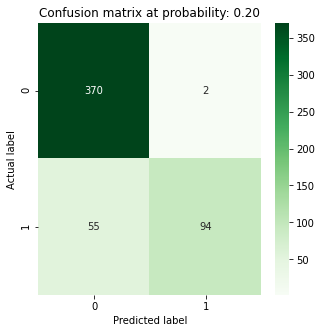

In [94]:
print('Matice záměn našeho finálního modelu na validačních syntetických datech \n')
plot_cm(yn_valid, ypred_final_synt)

Matice záměn našeho finálního modelu na testovacích datech 

No Time Deposit Detected (True Negatives):  984
New Time Deposit Incorrectly Detected (False Positives):  4
New Time Deposit Missed (False Negatives):  11
New Time Deposit Detected (True Positives):  1
Total New Deposits:  12


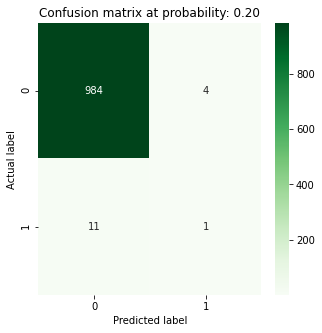

In [95]:
print('Matice záměn našeho finálního modelu na testovacích datech \n')
plot_cm(y_test, ypred_final_real)

Matice záměn vypadá velmi dobře, nicméně pořád odhalí jen 1 z tříd a 11 z nich klasifikuje nesprávně. Vzhledem k formulaci problému je vhodnější použít model, který může mít poměrově více FP, ale odhalí většinu TP.

Z hlediska řešení problému - pokud chceme např. cílit na zákazníky s nabídkou termínovaného vkladu - je vhodnější mít model, který má vysokou senzitivitu (tedy správě predikuje "pozitivní" případy, tedy zákazníky, co mají zájem o t. vklad), než model s vysokou specificitou.

Zde se nám toho podařilo dosáhnout u neuronových sítí - nás model má na testovacích datech, která nikdy neviděl, velmi malý počet falešných negativ - cenou za to je relativně vyšší poměr falešných pozitiv, což z hlediska problému pravděpodobně je pro společnost marginální náklad.

### Důležitost proměnných

U náhodného lesa jsme se ještě podívali na důežitost jednotlivých proměnných pro klasifikaci, i když z hlediska business problému je nejspíše vhodnější model NN.

Na grafu výše vidíme důležitost jednotlivých proměnných - ze všech 34 jsme vybrali pouze těch 12 nejdůležitějších.

Není překvapením, že nejdůležitější pro klasifikaci je držitelství kreditní karty (pozor, nejedná se o debetní kartu, ale opravdu kreditní, v ČR téměř nevyužívaná), dále momentální stav úspor, příjem atd.

In [96]:
#definice funkce pro správné pojmenování v grafu níže

importances = RFC_final.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC_final.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

def set_names_xticks(data = raw, indices = indices):
    '''data is original dataset with all features including label,
    y is label name as a string
    indices is a numpy array of feature IDs with correct order extracted from:
    importances = model.feature_importances_ 
    indices = np.argsort(importances)[::-1]
    Note: before running, ensure the plot is set up - run as last function in plot pipeline
    '''
    nms = raw.copy()
    nms_to_merge = pd.DataFrame({'Columns': nms.columns})
    nms_merged = nms_to_merge.merge(pd.DataFrame(indices), how = 'right', right_on = 0, left_index = True)
    nms_merged.columns = ['Variable', 'Position']
    plt_labels = [item.get_text() for item in ax.get_xticklabels()]
    for l in range(0,11):
        plt_labels[l] = nms_merged.loc[l]['Variable']
    ax.set_xticklabels(plt_labels)
    plt.xticks(range(X.shape[1]), plt_labels)

Feature ranking:
1. Credit_Cards_Flag (0.107062)
2. Total_Income (0.076550)
3. Saving_Current_Balance (0.075004)
4. Arrears_Months_Max (0.068077)
5. Age (0.057081)
6. Gender (0.054513)
7. Transfer_Trans_Amount (0.052138)
8. Total_transactions (0.050942)
9. Children_Num (0.043338)
10. Withdrawl_Trans_Amount (0.042635)
11. Married (0.032070)
12. Credit_Cards_Balance (0.031595)


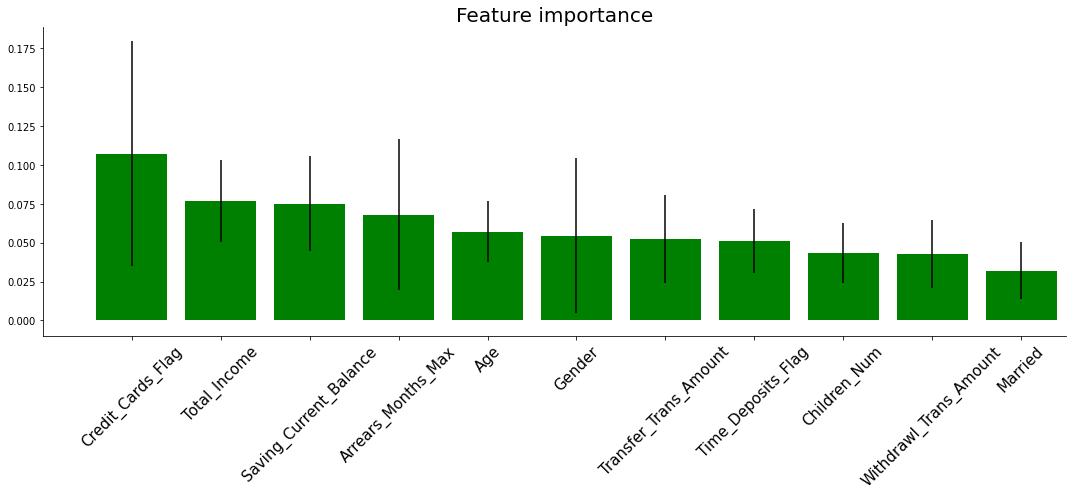

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt


print("Feature ranking:")
N_features = 0
for f in range(0, 12):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    N_features += 1

fig, ax = plt.subplots(figsize = (15, 7))
plt.title("Feature importance", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
        color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]]);

set_names_xticks(Xn_train, indices = indices)
plt.xticks(fontsize = 15,  rotation = 45)
plt.tight_layout()
sns.despine()
ax.set_xlim(-1, 10.5);

## FEATURE IMPORTANCES FROM NN

In [121]:
def train_model(): 
    input_size = X.shape[1]
    output_size = 1 #sigmoid = 1, softmax = 2
    hidden_layer_size = 100

    model3 = tf.keras.Sequential([
        tf.keras.layers.Dense(input_size, activation = 'relu'),
        tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
        tf.keras.layers.Dense(output_size, activation = 'sigmoid') 
    ])

    lr = 0.0001
    adam = tf.keras.optimizers.Adam(learning_rate=lr)
    model3.compile(optimizer = adam, loss = 'BinaryCrossentropy', metrics = ['accuracy'])
 
    return model3

In [117]:
Xn_train, yn_train = pd.DataFrame(Xn_train), pd.DataFrame(yn_train)

In [131]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

my_model = KerasClassifier(build_fn=train_model, batch_size = 1000, epochs = 270,
                      validation_data = (Xn_valid, yn_valid), verbose = 2)  
my_model.fit(Xn_train, yn_train)

perm = PermutationImportance(my_model, random_state=1).fit(Xn_train,yn_train)


eli5.show_weights(perm, feature_names = colsfinal[:-1])

Epoch 1/270

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

5/5 - 0s - loss: 0.7218 - accuracy: 0.4268 - val_loss: 0.7194 - val_accuracy: 0.3973
Epoch 2/270
5/5 - 0s - loss: 0.7109 - accuracy: 0.4485 - val_loss: 0.7104 - val_accuracy: 0.4012
Epoch 3/270
5/5 - 0s - loss: 0.7010 - accuracy: 0.4747 - val_loss: 0.7025 - val_accuracy: 0.4472
Epoch 4/270
5/5 - 0s - loss: 0.6920 - accuracy: 0.5046 - val_loss: 0.6953 - val_accuracy: 0.4760
Epoch 5/270
5/5 - 0s - loss: 0.6837 - accuracy: 0.5342 - val_loss: 0.6888 - val_accuracy: 0.4990
Epoch 6/270
5/5 - 0s - 

Epoch 78/270
5/5 - 0s - loss: 0.4929 - accuracy: 0.7475 - val_loss: 0.4532 - val_accuracy: 0.7965
Epoch 79/270
5/5 - 0s - loss: 0.4914 - accuracy: 0.7465 - val_loss: 0.4510 - val_accuracy: 0.7946
Epoch 80/270
5/5 - 0s - loss: 0.4900 - accuracy: 0.7472 - val_loss: 0.4491 - val_accuracy: 0.7927
Epoch 81/270
5/5 - 0s - loss: 0.4887 - accuracy: 0.7482 - val_loss: 0.4475 - val_accuracy: 0.7927
Epoch 82/270
5/5 - 0s - loss: 0.4873 - accuracy: 0.7480 - val_loss: 0.4459 - val_accuracy: 0.7946
Epoch 83/270
5/5 - 0s - loss: 0.4860 - accuracy: 0.7484 - val_loss: 0.4442 - val_accuracy: 0.7946
Epoch 84/270
5/5 - 0s - loss: 0.4846 - accuracy: 0.7489 - val_loss: 0.4425 - val_accuracy: 0.7927
Epoch 85/270
5/5 - 0s - loss: 0.4833 - accuracy: 0.7494 - val_loss: 0.4408 - val_accuracy: 0.7927
Epoch 86/270
5/5 - 0s - loss: 0.4820 - accuracy: 0.7506 - val_loss: 0.4388 - val_accuracy: 0.7927
Epoch 87/270
5/5 - 0s - loss: 0.4806 - accuracy: 0.7518 - val_loss: 0.4370 - val_accuracy: 0.7927
Epoch 88/270
5/5 - 0

Epoch 161/270
5/5 - 0s - loss: 0.4082 - accuracy: 0.7992 - val_loss: 0.3594 - val_accuracy: 0.8426
Epoch 162/270
5/5 - 0s - loss: 0.4074 - accuracy: 0.8002 - val_loss: 0.3589 - val_accuracy: 0.8426
Epoch 163/270
5/5 - 0s - loss: 0.4066 - accuracy: 0.8007 - val_loss: 0.3586 - val_accuracy: 0.8426
Epoch 164/270
5/5 - 0s - loss: 0.4057 - accuracy: 0.8009 - val_loss: 0.3578 - val_accuracy: 0.8426
Epoch 165/270
5/5 - 0s - loss: 0.4048 - accuracy: 0.8009 - val_loss: 0.3572 - val_accuracy: 0.8426
Epoch 166/270
5/5 - 0s - loss: 0.4040 - accuracy: 0.8021 - val_loss: 0.3568 - val_accuracy: 0.8445
Epoch 167/270
5/5 - 0s - loss: 0.4031 - accuracy: 0.8026 - val_loss: 0.3566 - val_accuracy: 0.8445
Epoch 168/270
5/5 - 0s - loss: 0.4022 - accuracy: 0.8024 - val_loss: 0.3562 - val_accuracy: 0.8426
Epoch 169/270
5/5 - 0s - loss: 0.4014 - accuracy: 0.8026 - val_loss: 0.3558 - val_accuracy: 0.8426
Epoch 170/270
5/5 - 0s - loss: 0.4006 - accuracy: 0.8028 - val_loss: 0.3554 - val_accuracy: 0.8426
Epoch 171/

Epoch 244/270
5/5 - 0s - loss: 0.3404 - accuracy: 0.8558 - val_loss: 0.3267 - val_accuracy: 0.8676
Epoch 245/270
5/5 - 0s - loss: 0.3396 - accuracy: 0.8565 - val_loss: 0.3270 - val_accuracy: 0.8714
Epoch 246/270
5/5 - 0s - loss: 0.3388 - accuracy: 0.8560 - val_loss: 0.3271 - val_accuracy: 0.8695
Epoch 247/270
5/5 - 0s - loss: 0.3380 - accuracy: 0.8556 - val_loss: 0.3269 - val_accuracy: 0.8695
Epoch 248/270
5/5 - 0s - loss: 0.3373 - accuracy: 0.8560 - val_loss: 0.3271 - val_accuracy: 0.8695
Epoch 249/270
5/5 - 0s - loss: 0.3365 - accuracy: 0.8570 - val_loss: 0.3266 - val_accuracy: 0.8695
Epoch 250/270
5/5 - 0s - loss: 0.3357 - accuracy: 0.8582 - val_loss: 0.3259 - val_accuracy: 0.8695
Epoch 251/270
5/5 - 0s - loss: 0.3350 - accuracy: 0.8594 - val_loss: 0.3252 - val_accuracy: 0.8695
Epoch 252/270
5/5 - 0s - loss: 0.3342 - accuracy: 0.8601 - val_loss: 0.3243 - val_accuracy: 0.8714
Epoch 253/270
5/5 - 0s - loss: 0.3334 - accuracy: 0.8606 - val_loss: 0.3234 - val_accuracy: 0.8752
Epoch 254/

5/5 - 0s - loss: 0.3405 - accuracy: 0.8652
5/5 - 0s - loss: 0.3258 - accuracy: 0.8628
5/5 - 0s - loss: 0.3397 - accuracy: 0.8621
5/5 - 0s - loss: 0.3519 - accuracy: 0.8553
5/5 - 0s - loss: 0.3872 - accuracy: 0.8303
5/5 - 0s - loss: 0.3327 - accuracy: 0.8587
5/5 - 0s - loss: 0.3481 - accuracy: 0.8452
5/5 - 0s - loss: 0.3407 - accuracy: 0.8510
5/5 - 0s - loss: 0.3250 - accuracy: 0.8666
5/5 - 0s - loss: 0.3417 - accuracy: 0.8524
5/5 - 0s - loss: 0.3438 - accuracy: 0.8430
5/5 - 0s - loss: 0.3342 - accuracy: 0.8635
5/5 - 0s - loss: 0.3356 - accuracy: 0.8541
5/5 - 0s - loss: 0.3322 - accuracy: 0.8616
5/5 - 0s - loss: 0.3300 - accuracy: 0.8640
5/5 - 0s - loss: 0.3578 - accuracy: 0.8445
5/5 - 0s - loss: 0.3501 - accuracy: 0.8409
5/5 - 0s - loss: 0.3557 - accuracy: 0.8409
5/5 - 0s - loss: 0.3449 - accuracy: 0.8483
5/5 - 0s - loss: 0.3542 - accuracy: 0.8464
5/5 - 0s - loss: 0.3372 - accuracy: 0.8563
5/5 - 0s - loss: 0.3644 - accuracy: 0.8560
5/5 - 0s - loss: 0.3454 - accuracy: 0.8428
5/5 - 0s - 

Weight,Feature
0.0421 ± 0.0073,Age
0.0293 ± 0.0030,Children_Num
0.0263 ± 0.0025,Employees
0.0263 ± 0.0020,Gender
0.0240 ± 0.0035,Consumer_Loans_Balance
0.0238 ± 0.0028,Investment_Products_Balance
0.0234 ± 0.0030,Credit_Cards_Flag
0.0234 ± 0.0031,Total_transactions
0.0231 ± 0.0050,Saving_Current_Balance
0.0224 ± 0.0036,Withdrawl_Trans_Amount
